In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eurosat-dataset/EuroSATallBands/validation.csv
/kaggle/input/eurosat-dataset/EuroSATallBands/train.csv
/kaggle/input/eurosat-dataset/EuroSATallBands/test.csv
/kaggle/input/eurosat-dataset/EuroSATallBands/label_map.json
/kaggle/input/eurosat-dataset/EuroSATallBands/SeaLake/SeaLake_2893.tif
/kaggle/input/eurosat-dataset/EuroSATallBands/SeaLake/Jakarta_000334.tif
/kaggle/input/eurosat-dataset/EuroSATallBands/SeaLake/SeaLake_2765.tif
/kaggle/input/eurosat-dataset/EuroSATallBands/SeaLake/SeaLake_2733.tif
/kaggle/input/eurosat-dataset/EuroSATallBands/SeaLake/SeaLake_1037.tif
/kaggle/input/eurosat-dataset/EuroSATallBands/SeaLake/SeaLake_2961.tif
/kaggle/input/eurosat-dataset/EuroSATallBands/SeaLake/Jakarta_000479.tif
/kaggle/input/eurosat-dataset/EuroSATallBands/SeaLake/SeaLake_1373.tif
/kaggle/input/eurosat-dataset/EuroSATallBands/SeaLake/SeaLake_271.tif
/kaggle/input/eurosat-dataset/EuroSATallBands/SeaLake/SeaLake_2418.tif
/kaggle/input/eurosat-dataset/EuroSATallBands/SeaLake/

In [4]:
# For using operating system functionality
import pathlib
import os

#for numerical and tabular data handling
import numpy as np
import pandas as pd

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for image processing
import PIL

#specifically for neural network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### Reading the dataset for RGB bands only

In [11]:
data_dir= pathlib.Path('../input/eurosat-dataset/EuroSAT')

In [12]:
total_images= len(list(data_dir.glob('*/*.jpg')))
print("Total images in RGB bands are: ", total_images)

Total images in RGB bands are:  27000


In [13]:
# Reading the training csv files
eurosat_train= pd.read_csv('../input/eurosat-dataset/EuroSAT/train.csv')
eurosat_train.head()

Unnamed: 0                                           Filename  Label  \
0       16257                      AnnualCrop/AnnualCrop_142.jpg      0   
1        3297  HerbaceousVegetation/HerbaceousVegetation_2835...      2   
2       17881               PermanentCrop/PermanentCrop_1073.jpg      6   
3        2223                      Industrial/Industrial_453.jpg      4   
4        4887  HerbaceousVegetation/HerbaceousVegetation_1810...      2   

              ClassName  
0            AnnualCrop  
1  HerbaceousVegetation  
2         PermanentCrop  
3            Industrial  
4  HerbaceousVegetation

In [16]:
#Checking total images in training dataset
print(eurosat_train.shape[0])

18900


In [17]:
eurosat_train['ClassName'].value_counts()

AnnualCrop              2100
HerbaceousVegetation    2100
Residential             2100
SeaLake                 2100
Forest                  2100
PermanentCrop           1750
Industrial              1750
Highway                 1750
River                   1750
Pasture                 1400
Name: ClassName, dtype: int64

In [18]:
import matplotlib.image as mpimg
image= mpimg.imread("../input/eurosat-dataset/EuroSAT/AnnualCrop/AnnualCrop_1.jpg")
plt.imshow(image)
plt.show()

In [19]:
image.shape

(64, 64, 3)

### Creating a dataset as tf.data.Dataset

In [20]:
batch_size=32
img_height=64
img_width= 64

In [26]:
training= tf.data.Dataset.from_tensor_slices((eurosat_train['Filename'].values, eurosat_train.ClassName.values))

In [27]:
type(training)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

In [24]:
train_ds= tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                             seed=123,
                                                             validation_split= 0.2,
                                                             subset= 'training',
                                                             image_size=(img_height, img_width),
                                                             batch_size=batch_size)

Found 27000 files belonging to 10 classes.
Using 21600 files for training.



User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_PATTERN='hyper,hyper'
   KMP_REDUCTION_BARRIER='1,1'
  

In [28]:
type(train_ds)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [31]:
valid_ds= tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                             seed= 123,
                                                             validation_split= 0.2,
                                                             subset= 'validation',
                                                             image_size= (img_height, img_width),
                                                             batch_size=batch_size)

Found 27000 files belonging to 10 classes.
Using 5400 files for validation.


In [39]:
train_ds.take(1)

<TakeDataset shapes: ((None, 64, 64, 3), (None,)), types: (tf.float32, tf.int32)>

image_batch is a tensor of shape(32, 64, 64, 3) where 32 is batch size, 64 X 64 is dimension of image and 3 corresponds to RGB channel

label_batch is a tensor of shape(32,).

In [34]:
class_Names= train_ds.class_names
print("Total classes are: ", len(class_Names))
print(class_Names)

Total classes are:  10
['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']


### Data Visualization

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
for i in range(len(class_Names)):
    filtered_ds= train_ds.filter(lambda x, l: tf.math.equal(l[0], i))
    for image, label in filtered_ds.take(1):
        ax= plt.subplot(5,2,i+1)
        plt.imshow(image[0].numpy().astype('uint8'))
        plt.title(class_Names[label.numpy()[0]])
        plt.axis('off')

2022-01-16 18:37:51.050111: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


### Creating the model

In [40]:
AUTOTUNE= tf.data.experimental.AUTOTUNE
train_ds= train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
valid_ds= valid_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [42]:
num_classes= len(class_Names)

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape= (img_height, img_width, 3)),
    layers.Conv2D(32,3, padding='same', activation= 'relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

### Compiling the model choosing appropriate loss, metrics and optimizer

In [43]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0

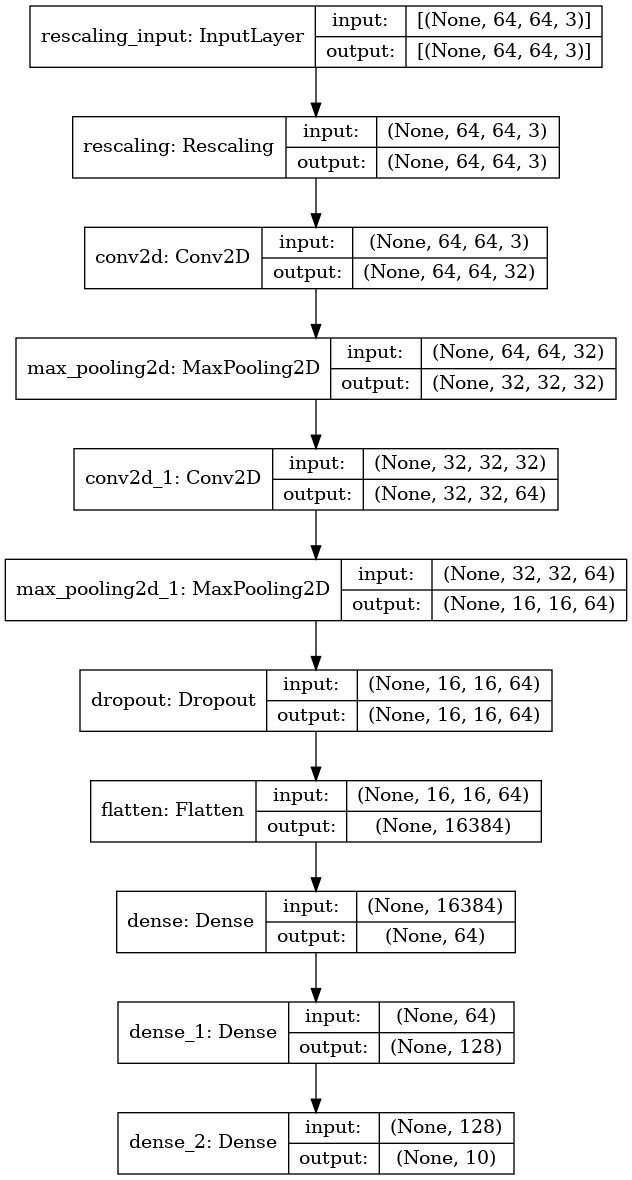

In [44]:
tf.keras.utils.plot_model(model=model, show_shapes=True, show_layer_names=True)

### Train the model

In [46]:
epochs= 20
history= model.fit(train_ds, validation_data=valid_ds, epochs=epochs, verbose=1)

Epoch 1/20
675/675 [==============================] - 48s 71ms/step - loss: 0.4763 - accuracy: 0.8308 - val_loss: 0.5269 - val_accuracy: 0.8231
Epoch 2/20
675/675 [==============================] - 47s 70ms/step - loss: 0.4242 - accuracy: 0.8492 - val_loss: 0.5579 - val_accuracy: 0.7981
Epoch 3/20
675/675 [==============================] - 47s 70ms/step - loss: 0.3967 - accuracy: 0.8593 - val_loss: 0.5586 - val_accuracy: 0.8076
Epoch 4/20
675/675 [==============================] - 51s 75ms/step - loss: 0.3567 - accuracy: 0.8738 - val_loss: 0.6056 - val_accuracy: 0.7976
Epoch 5/20
675/675 [==============================] - 48s 71ms/step - loss: 0.3243 - accuracy: 0.8849 - val_loss: 0.5382 - val_accuracy: 0.8224
Epoch 6/20
675/675 [==============================] - 49s 72ms/step - loss: 0.3002 - accuracy: 0.8938 - val_loss: 0.5292 - val_accuracy: 0.8244
Epoch 7/20
675/675 [==============================] - 49s 72ms/step - loss: 0.2858 - accuracy: 0.8986 - val_loss: 0.5947 - val_accuracy:

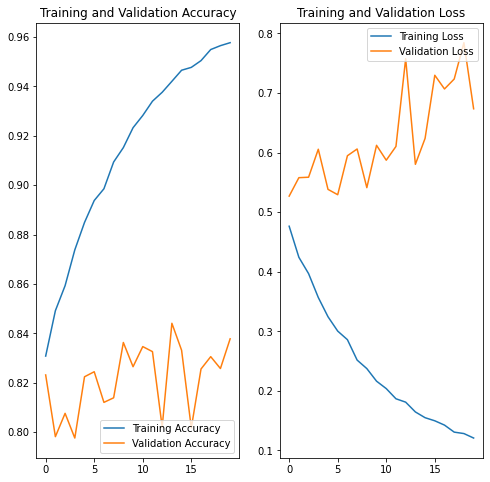

In [47]:
#Visualizing the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()